<a href="https://colab.research.google.com/github/Slate2d/ML-notebooks/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',

              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.8543 - loss: 0.4708 - val_accuracy: 0.9788 - val_loss: 0.0712
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9821 - loss: 0.0574 - val_accuracy: 0.9869 - val_loss: 0.0442
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.9878 - loss: 0.0364 - val_accuracy: 0.9871 - val_loss: 0.0445
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.9899 - loss: 0.0310 - val_accuracy: 0.9879 - val_loss: 0.0410
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9928 - loss: 0.0239 - val_accuracy: 0.9886 - val_loss: 0.0384


In [ ]:
import numpy as np
y_pred_prob = model.predict(test_images)

y_pred = np.argmax(y_pred_prob, axis=1)

y_true = np.argmax(test_labels, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


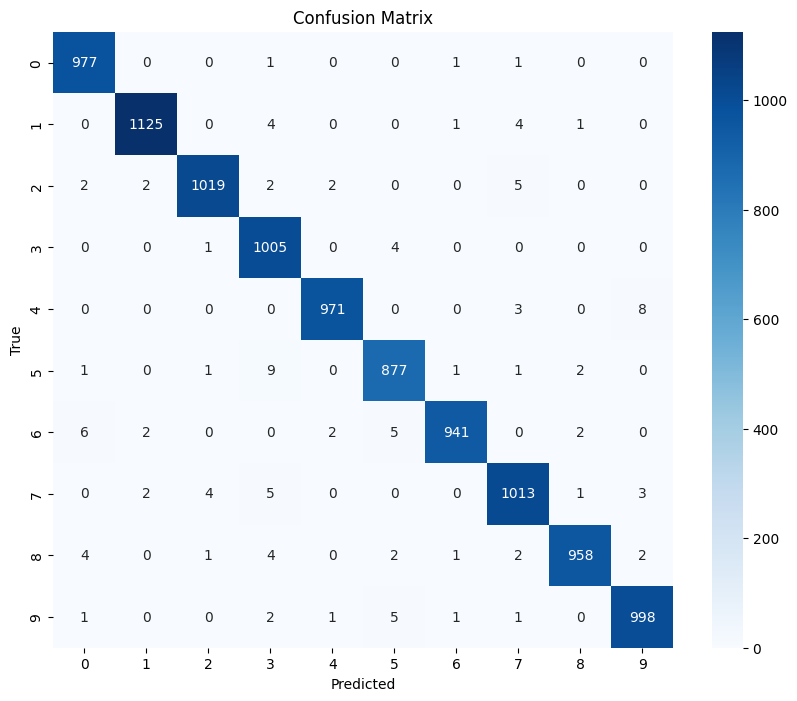

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(10)]))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_scores = []
for i in range(10):
    roc_auc_scores.append(roc_auc_score(test_labels[:, i], y_pred_prob[:, i]))

print("ROC-AUC for each class:", roc_auc_scores)
print("Mean ROC-AUC:", np.mean(roc_auc_scores))

ROC-AUC for each class: [0.9999798633422327, 0.9999050863292013, 0.9999660723053199, 0.9999196026387955, 0.9999768510049374, 0.9998191852232601, 0.999932234587005, 0.9999231287654978, 0.999948016931238, 0.9998885572060332]
Mean ROC-AUC: 0.999925859833352


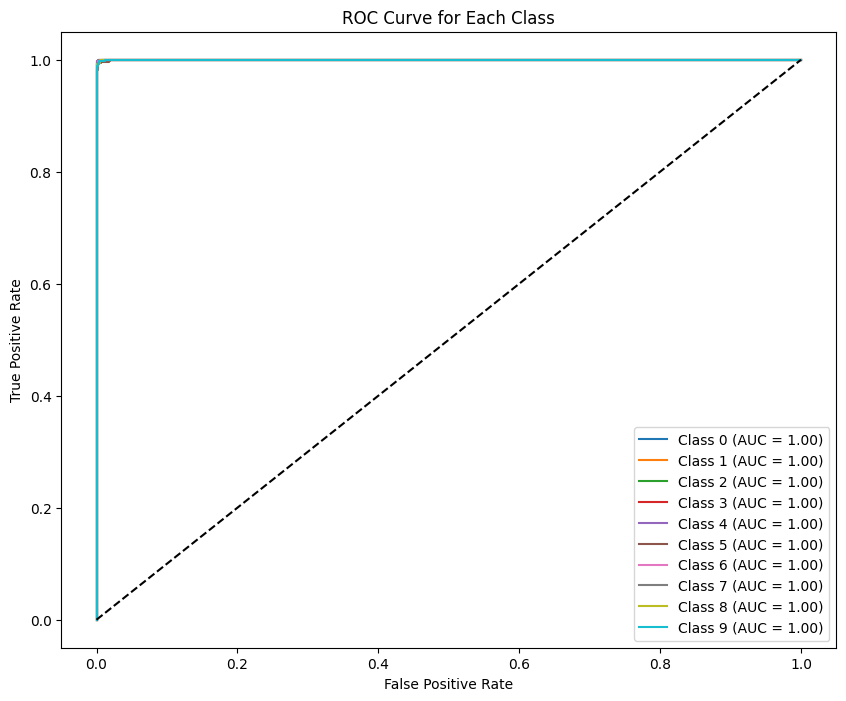

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for i in range(10):
    fpr, tpr, _ = roc_curve(test_labels[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.show()